# Regressão Linear

A regressão linear compreende a classe de problemas em que as entradas e saídas possuem uma relação linear, conforme ilustrado pela figura abaixo.

<img src="imgs/linear_model.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Exemplo de relação linear entre x e y.
</div>

<br>

Nestes casos o modelo do sistema pode ser expresso como uma combinação linear dos parâmetros $\theta_{1}$ e $\theta_{2}$:

$$h_{\theta}(x) = \theta_{1} + \theta_{2} x$$

## Notação Matricial

A implementação dos algoritmos de aprendizagem de máquina através da notação matricial resulta em elevado ganho de performance. Afinas as linguagens de programação de alto nível como octave, matlab e python possuem algoritmos especializados para operação matricial transformando esta notação muito superior a representação do problema através de laços.

Outra vantagem da notação matricial é a possibilidade de paralelização dos cálculos, principalmente das operações de multiplicação. Abaixo segue um exemplo desta notação aplicada à regressão linear.

$$\small x = \begin{bmatrix} 2104 & 1416 & 1534 & 852\end{bmatrix}$$

$$ \small \theta = \begin{bmatrix} \theta_{1} \\ \theta_{2}\end{bmatrix} = \begin{bmatrix} -40 & 200 & -150 \\ 0.25 & 0.1 & 0.4\end{bmatrix}$$

$$ \small h(x) = \begin{bmatrix} 1 & 2104 \\ 1 & 1416 \\ 1 & 1534 \\ 1 & 852 \end{bmatrix} . \begin{bmatrix} -40 & 200 & -150 \\ 0.25 & 0.1 & 0.4\end{bmatrix} = \begin{bmatrix} 486 & 410 & 692 \\ 314 & 342 & 416 \\ 344 & 353 & 464 \\ 173 & 285 & 191\end{bmatrix}$$

Cada coluna da matriz $h(x)$ resultante indica as estimativas para cada conjunto de hipótese $(\theta_{1}^{i}, \theta_{2}^{i})$, já as linhas da matriz refletem as estimativas para cada entrada $x^{i}$. A função abaixo implementa o modelo linear proposto.

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# linear regression hypothesis: o1 + o2*x
def h(x, o):
    m = len(x)
    input = np.zeros((m, 2))
    input[:,0] = np.ones(m)
    input[:,1] = x[:, 0]
    
    return np.dot(input, o)

## Treinamento

O trabalho do processo de treinamento consiste em determinar os parâmetros do modelo que minimizam a diferença entre as estimativas do modelo $h_{\theta}(x^{i})$ e as saídas conhecidas $y^{i}$ para todos os conjuntos de treinamento. A quantificação dessa diferença, também denominada de **função custo J**, pode ser obtida através dos algoritmos: Erro Quadrático Médio (MSE), Erro Médio Absoluto (MAE), dentre outros.

$$J_1 = MSE = \frac{1}{m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})^{2}$$
$$J_2 = MAE = \frac{1}{m} \sum\limits_{i=1}^{m}|h_{\theta}(x^{i}) - y^{i}|$$

As funções abaixo implementam os dois algoritmos.

In [32]:
def MSE(x, o, y):
    m = len(x)
    h_x = h(x, o)
    return np.sum(np.power(h_x - y, 2), axis=0)*1/m

def MAE(x, o, y):
    m = len(x)
    h_x = h(x, o)
    return np.sum(np.abs(h_x - y), axis=0)*1/m

A função abaixo retorna: o conjunto de parâmetros que minimiza a função f recebida, o erro resultante da utilização destes parâmetros e também as saídas obtidas com a utilização do modelo estimado.

In [33]:
def minimize(f, x, o, y):
    f_x = f(x, o, y)
    f_x_min_idx = np.argmin(f_x)
    f_x_min = f_x[f_x_min_idx]
    f_x_min_o = o[:, f_x_min_idx]
    h_min_o = h(x, f_x_min_o)
    return [f_x_min_o, f_x_min, h_min_o]

A função a seguir determina para cada função custo qual o conjunto de parâmetros que resulta no menor erro de estimativa além de comparar os modelos estimados com os dados de treinamento. 

In [34]:
def compute(x, o, y):
    # MSE like cost function
    [min_o_mse, mse_min, h_mse] = minimize(MSE, x, o ,y)

    # MAE like cost function
    [min_o_mae, mae_min, h_mae] = minimize(MAE, x, o ,y)

    plt.figure(figsize=(20,8))

    plt.plot(x, y, '*')
    plt.plot(x, h_mse)
    plt.plot(x, h_mae)
    
    h_mse_legend = 'h_mse = ' + str(round(min_o_mse[0],2)) + ' + ' + str(round(min_o_mse[1],2)) + '*x'
    h_mae_legend = 'h_mae = ' + str(round(min_o_mae[0],2)) + ' + ' + str(round(min_o_mae[1],2)) + '*x'

    plt.legend(['y', h_mse_legend, h_mae_legend])

O script abaixo define um conjunto de treinamento para a função $y$.

In [35]:
x = np.arange(0, 10, 1)
m = len(x)
x = np.reshape(x, [m, 1])
y = 1 + 2*x

Posteriormente é gerado de forma randômica $n_o$ conjuntos de parâmetros para o modelo. 

In [36]:
# random [[o1],[o2]] parameter values
n_o = 10000
o = np.random.normal(size = [2, n_o])

A figura abaixo compara os resultados dos modelos obtidos com cada função custo.

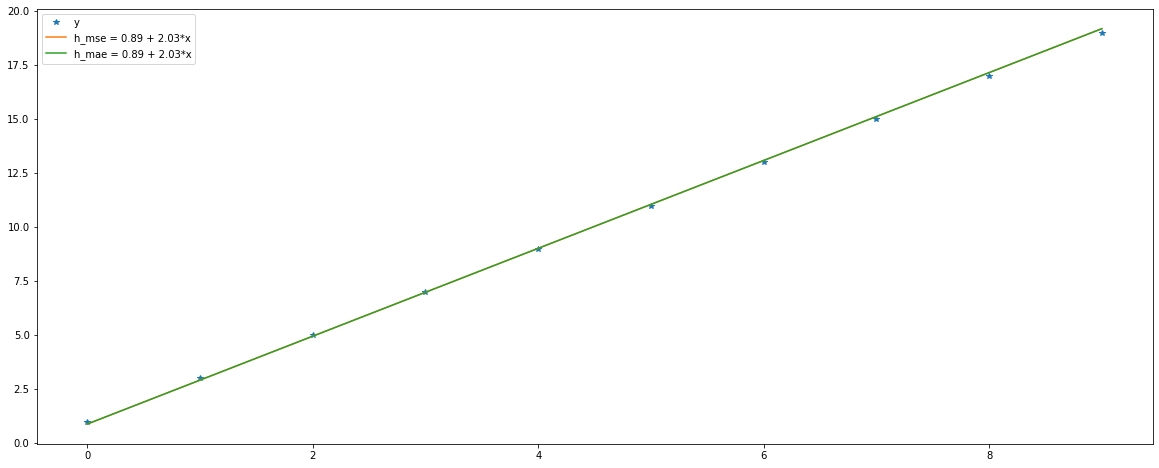

In [37]:
compute(x, o, y)

Pela inspeção dos resultados obtidos é possível verificar que a minimização das funções custo produziu uma boa estimativa do modelo do sistema, além de ambas as funções terem resultado no mesmo conjunto de parâmetros. 

A seguir, com o objetivo de avaliar a robustez do algoritmo de aprendizado proposto, o script abaixo introduz um outlier arbitrário no conjunto de dados de treinamento.

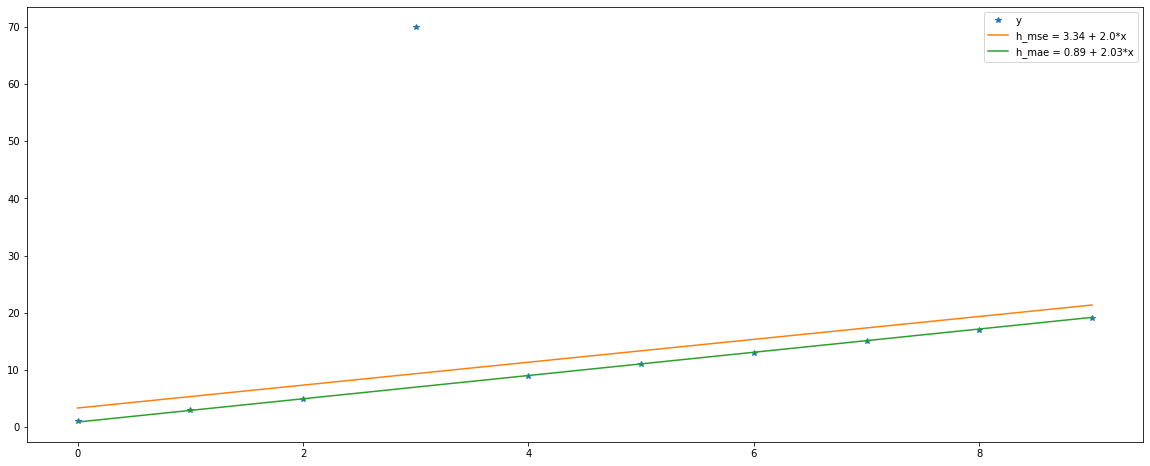

In [38]:
# introduce outlier
y[3] *= 10

compute(x, o, y)

Neste exemplo é possível verificar que o MSE divergiu bastante com relação a determinação dos parâmetros do modelo. Isto se deve a uma maior penalização para os pontos distantes da curva quando empregado o MSE, afinal neste caso o erro da estimativa é elevado ao quadrado. Sendo assim, para minimizar o erro do modelo, os parâmetros obtidos com o MSE tendem a propor uma reta que se aproxima dos outliers. 

Em aplicações reais é comum a utilização de uma etapa de pré-processamento dos dados de treinamento para remoção dos outliers. Ademais, o MSE é largamente adotado para avaliação dos algoritmos de aprendizado de máquina visto que permite verificar o comportamento do modelo com relação a presença de outliers.

## Visualização do Custo

Uma forma de verificar o comportamento da função custo em função da variação dos parâmetros do modelo é através da análise gráfica. A seguir são apresentados os dois métodos mais empregados no contexto dos problemas de regressão linear. 

### Superfície
As funções custo para a regressão linear são funções quadráticas bivariadas, ou seja, possuem duas variáveis de entrada e uma de saída. A representação gráfica de funções bivariadas pode ser obtida com uma superfície em um plano tridimensional. A figura abaixo ilustra a superfície que representa o retorno da função MAE para um conjunto de parâmetros arbitrário.

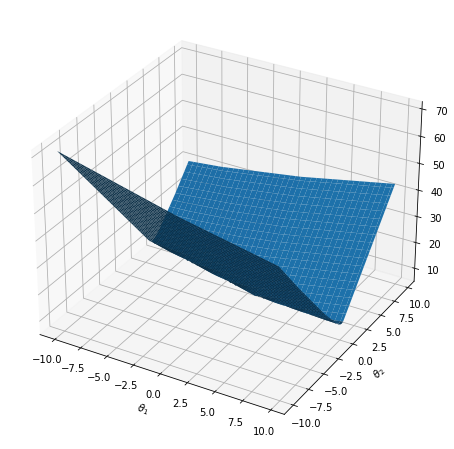

In [39]:
# arbitrary parameters 
o1 = np.arange(-10, 10, 0.25)
o2 = np.arange(-10, 10, 0.25)

# prepare data in meshgrid format
X, Y = np.meshgrid(o1, o2)

# serialize meshgrid to use MAE
c_o = np.power(len(o1), 2)
o = np.zeros((2, c_o))
o[0, :] = np.reshape(X, [1, c_o]) 
o[1, :] = np.reshape(Y, [1, c_o])
mae = MAE(x, o, y)

# transform mae to meshgrid
Z = np.reshape(mae, np.shape(X))

# plot
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$\theta_{1}$')
ax.set_ylabel(r'$\theta_{2}$')
ax.plot_surface(X, Y, Z)

Verifica-se que por ser uma função modular a superfície resultante possui um formato em ‘V’, cujo mínimo é obtido para os parâmetros $(1, 2)$.

### Curvas de Nível

As curvas de nível fornecem uma excelente alternativa para a visualização de funções quadráticas bivariadas, nestas representações todas as informações são condensadas em um plano de duas dimensões. O Script abaixo mostra as curvas de nível da função MAE para um conjunto de parâmetros arbitrário.

Text(0, 0.5, '$\\theta_{2}$')

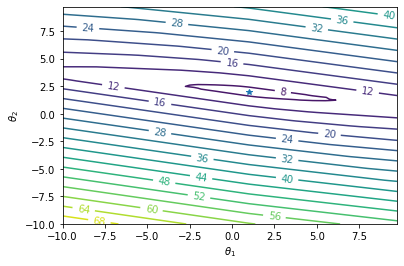

In [40]:
# plot countour lines
contours = plt.contour(X, Y, Z, 20)
plt.plot(1,2, '*') # center point -> minimum cost
plt.clabel(contours, inline = True, fontsize = 10)
plt.xlabel(r'$\theta_{1}$')
plt.ylabel(r'$\theta_{2}$')

Nesta representação todos os pontos $(\theta_1^i, \theta_2^i)$ situados sobre a mesma circunferência possuem o mesmo custo, ou seja retornam o mesmo valor quando aplicados a função MAE. À medida em que os pontos se aproximam do centro da figura o custo é diminuído de tal forma que o custo mínimo é dado pelo ponto central da menor circunferência de coordenadas $(1,2)$.


## Considerações Finais
A estratégia randômica, baseada em tentativa e erro, utilizada neste capítulo para a determinação dos parâmetros que minimizam a função custo possui um alto custo computacional, afinal foram necessários $n_{o} = 10.000$ conjuntos de parâmetros para que a convergência fosse garantida.

Os algoritmos desenvolvidos neste capítulo podem ser obtidos em [src/linear_regression.py](src/linear_regression.py).

O capítulo a seguir apresenta o algoritmo **Gradiente Descendente**, uma alternativa mais eficiente para a minimização da função custo.